In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("/kaggle/input/mall-customer/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Exploratory Data Analysis

In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


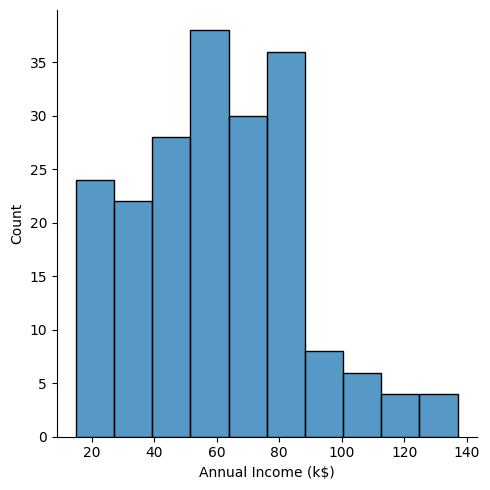

In [10]:
sns.displot(df['Annual Income (k$)'])

In [11]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

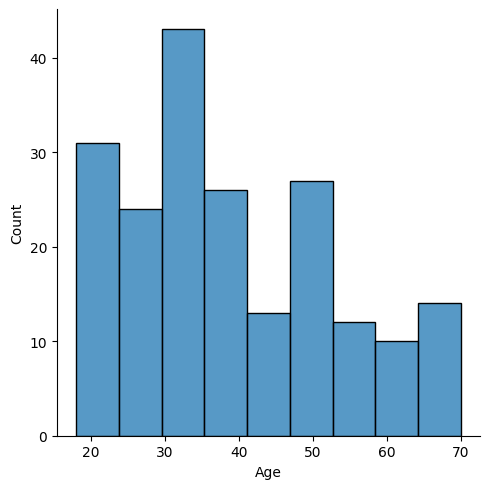

<Figure size 640x480 with 0 Axes>

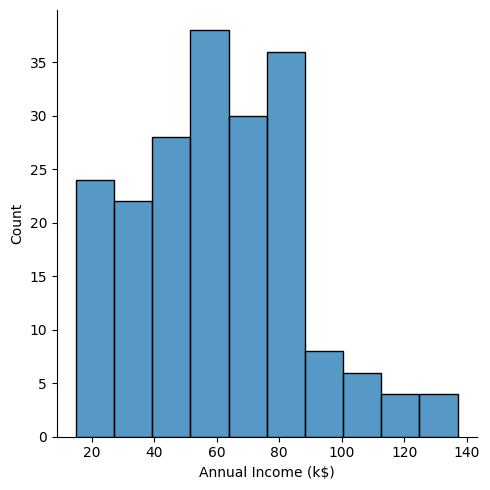

<Figure size 640x480 with 0 Axes>

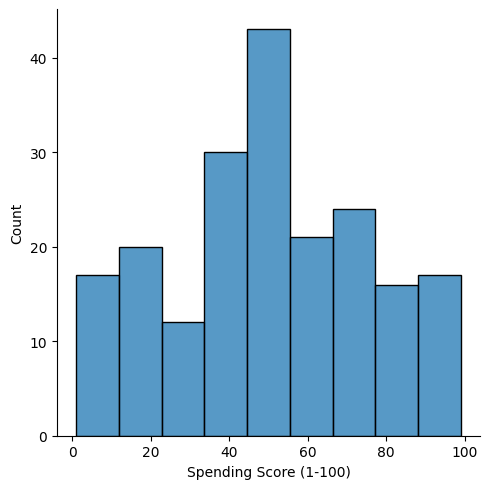

In [12]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.displot(df[i])
    

<Figure size 640x480 with 0 Axes>

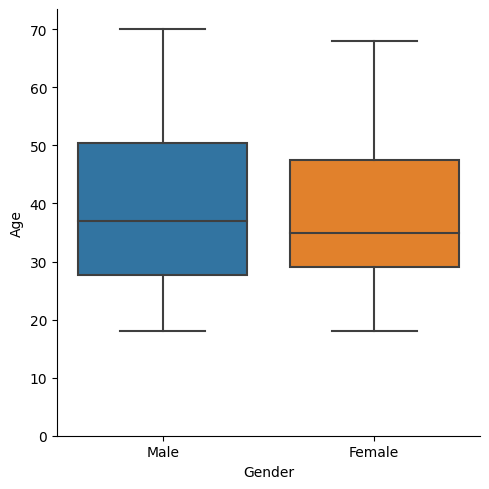

<Figure size 640x480 with 0 Axes>

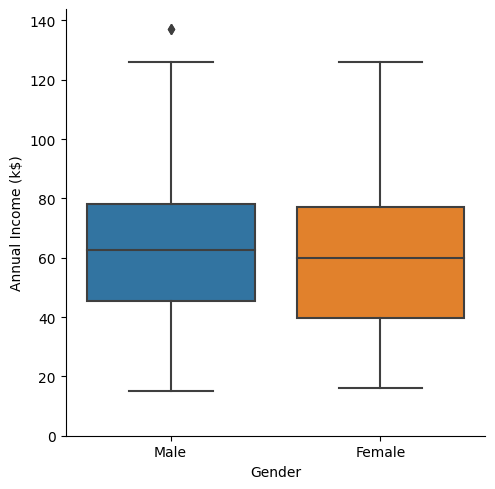

<Figure size 640x480 with 0 Axes>

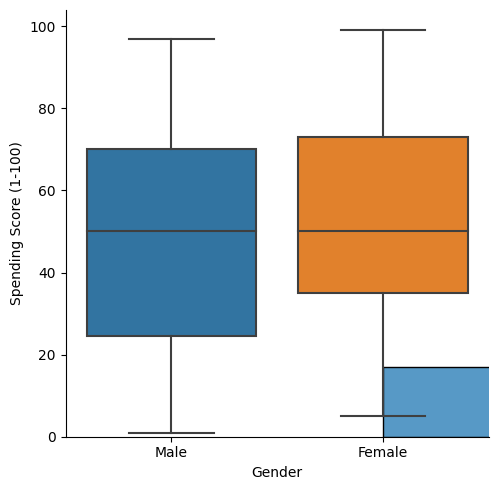

In [18]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.displot(df[i])
    sns.boxplot(data = df, x='Gender', y=df[i])
    plt.show()

In [14]:
df['Gender'].value_counts(normalize = True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

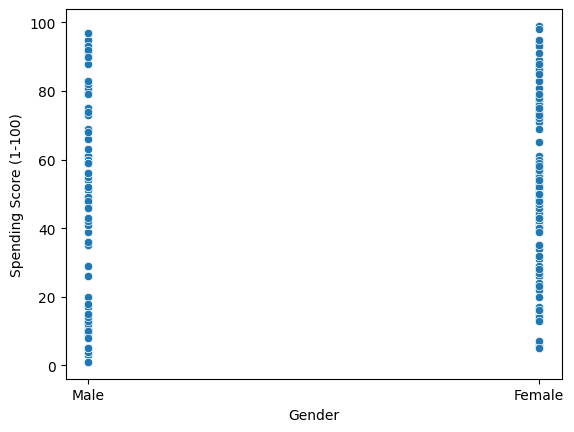

In [19]:
sns.scatterplot(data= df, x='Gender', y = 'Spending Score (1-100)')
plt.show()

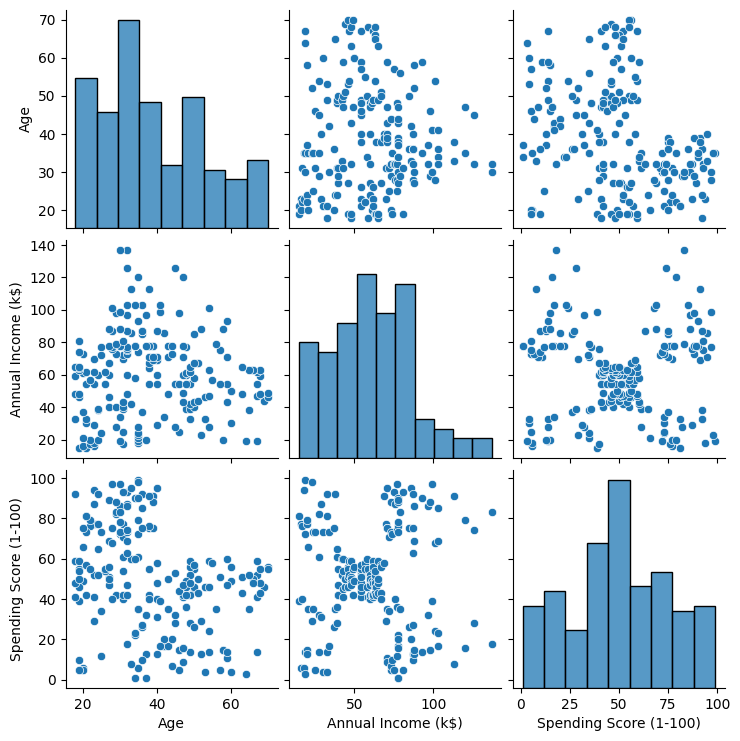

In [20]:
# axis=0 --> row
# axis=1 --> column
df=df.drop('CustomerID', axis=1)
sns.pairplot(df)
plt.show()

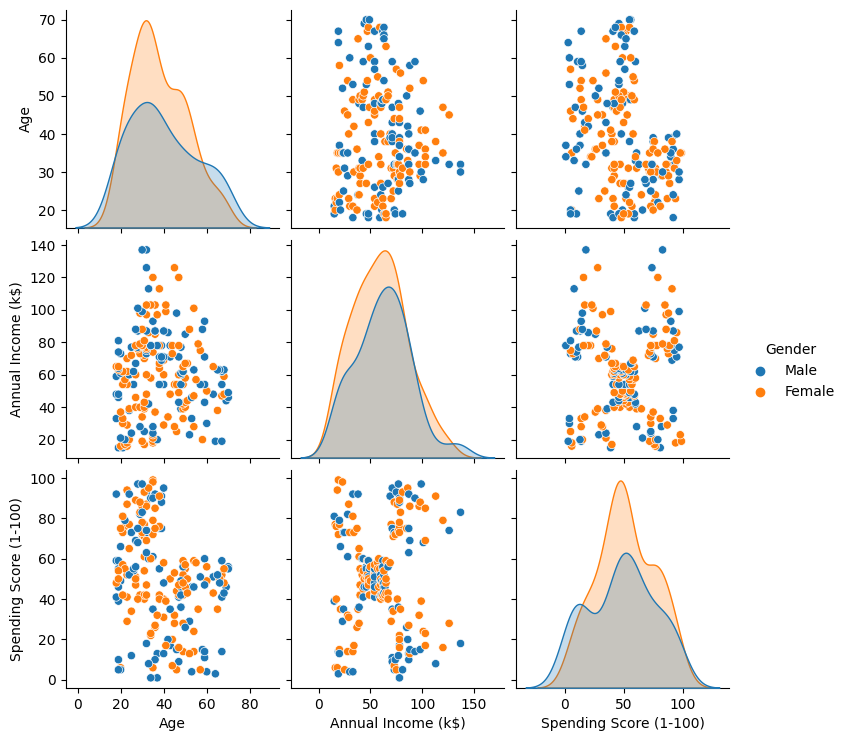

In [22]:
sns.pairplot(df, hue = 'Gender')
plt.show()

In [24]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

/tmp/ipykernel_34/4108468456.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Gender'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [25]:
df.corr()

/tmp/ipykernel_34/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


/tmp/ipykernel_34/2670760893.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap= 'coolwarm')


<AxesSubplot: >

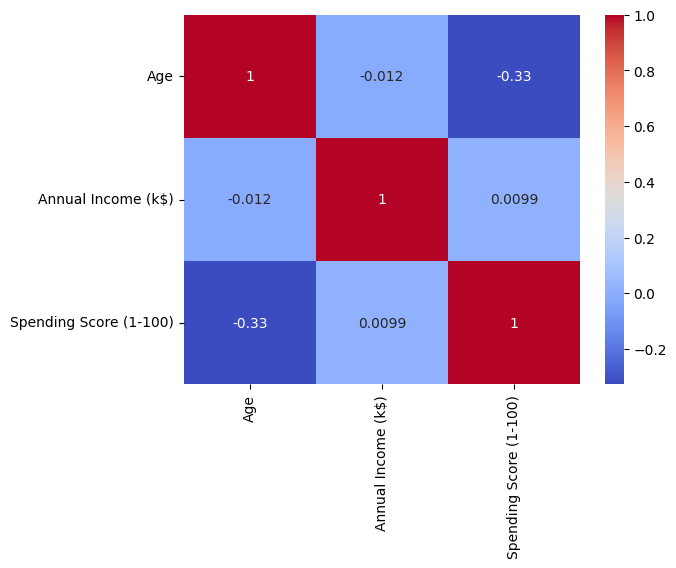

In [28]:
sns.heatmap(df.corr(), annot=True, cmap= 'coolwarm')

# Kmeans Algorithm For Clustering
# #clustering- Univariat, Bivariat, Multivariat

In [35]:
clustering1 = KMeans(n_clusters = 3)

In [36]:
clustering1.fit(df[['Annual Income (k$)']])

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [38]:
clustering1.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [40]:
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,3
1,Male,21,15,81,3
2,Female,20,16,6,3
3,Female,23,16,77,3
4,Female,31,17,40,3


In [41]:
df['Income Cluster'].value_counts()

5    48
0    42
2    42
3    32
4    28
1     8
Name: Income Cluster, dtype: int64

# Optimize the cluster

In [43]:
inertia_score = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_score.append(kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [44]:
inertia_score 

[137277.28000000003,
 48660.88888888889,
 23517.330930930926,
 13278.112713472488,
 8481.49619047619,
 5050.904761904763,
 3931.988095238096,
 2857.441697191697,
 2168.4787157287155,
 1734.1677489177487]

# It's 3 so go and change cluster_n = 3

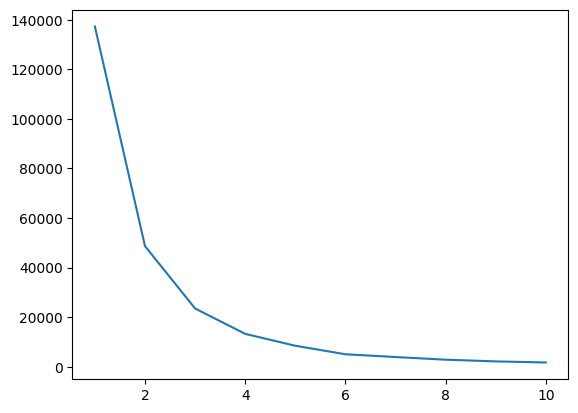

In [45]:
plt.plot(range(1,11), inertia_score)

# Bivariate

In [46]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [49]:
clustering2 = KMeans(n_clusters = 5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['spending and Income'] = clustering2.labels_
df.head()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,spending and Income
0,Male,19,15,39,3,4
1,Male,21,15,81,3,3
2,Female,20,16,6,3,4
3,Female,23,16,77,3,3
4,Female,31,17,40,3,4


# Optimize
# its 5 so change to 5 clusters

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

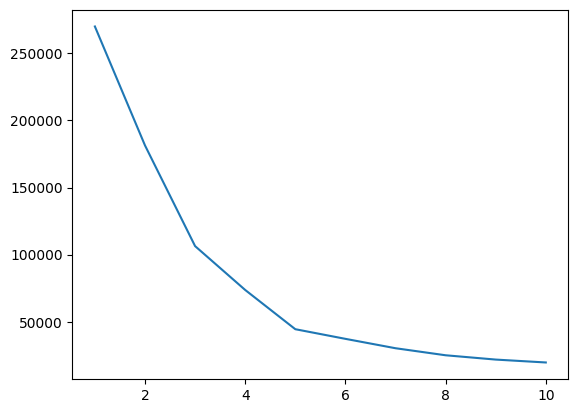

In [48]:
inertia_score2 = []
for i in range(1,11):
    kmeans2 = KMeans(n_clusters = i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_score2.append(kmeans2.inertia_)
plt.plot(range(1,11), inertia_score2)

In [55]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['X', 'Y']
centers

,X,Y
0,86.538462,82.128205
1,55.296296,49.518519
2,88.200000,17.114286
3,25.727273,79.363636
4,26.304348,20.913043


<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

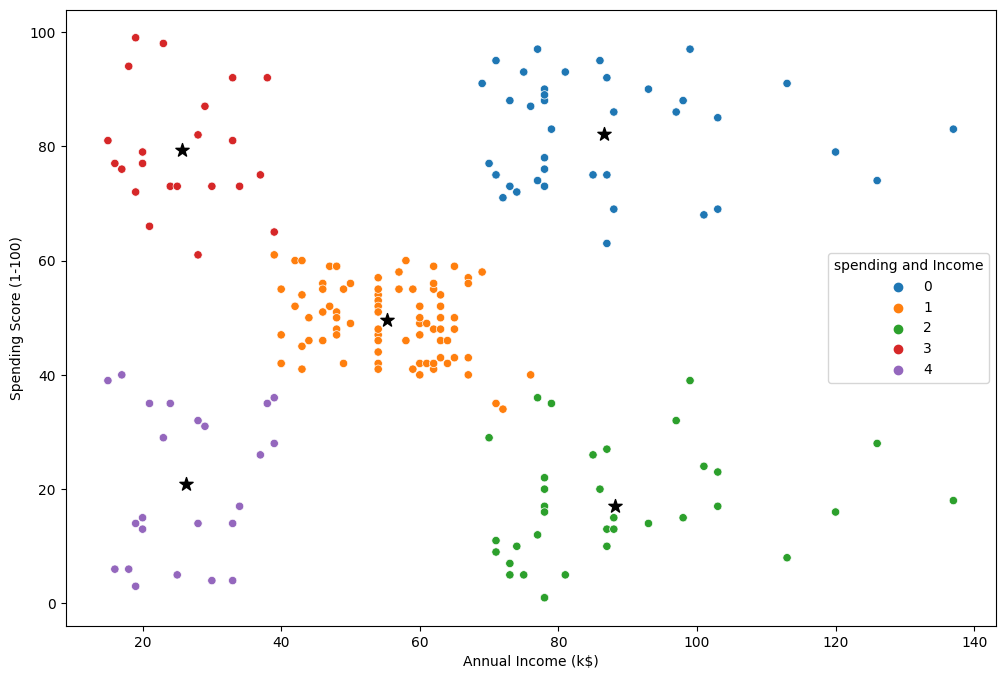

In [59]:
plt.figure(figsize=(12,8))
plt.scatter(x = centers['X'], y = centers['Y'], s=100, c='black', marker = '*' )
sns.scatterplot(data = df, x= 'Annual Income (k$)' , y= 'Spending Score (1-100)', hue= 'spending and Income', palette = 'tab10')

In [57]:
pd.crosstab(df['spending and Income'], df['Gender'], normalize = 'index' )

Gender,Female,Male
spending and Income,,
0,0.538462,0.461538
1,0.592593,0.407407
2,0.457143,0.542857
3,0.590909,0.409091
4,0.608696,0.391304


In [60]:
df.groupby(['spending and Income'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

/tmp/ipykernel_34/2707517846.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['spending and Income'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()


,Age,Annual Income (k$),Spending Score (1-100)
spending and Income,,,
0,32.692308,86.538462,82.128205
1,42.716049,55.296296,49.518519
2,41.114286,88.200000,17.114286
3,25.272727,25.727273,79.363636
4,45.217391,26.304348,20.913043


# Multivariate cluster
# requires preprocessing

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scale = StandardScaler()

In [63]:
dff = pd.get_dummies(df, drop_first = True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,spending and Income,Gender_Male
0,19,15,39,3,4,1
1,21,15,81,3,3,1
2,20,16,6,3,4,0
3,23,16,77,3,3,0
4,31,17,40,3,4,0


In [64]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'spending and Income', 'Gender_Male'],
      dtype='object')

In [66]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [68]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

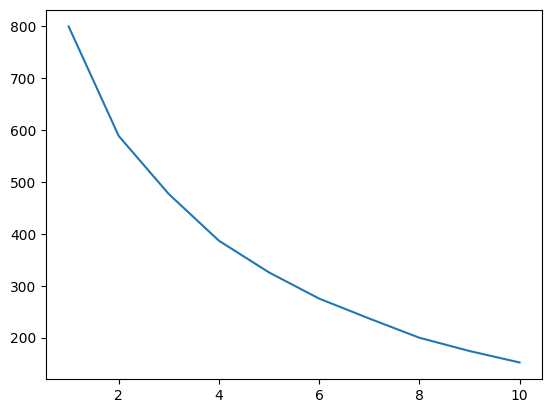

In [69]:
inertia_score3 = []
for i in range(1,11):
    kmeans3 = KMeans(n_clusters = i)
    kmeans3.fit(dff)
    inertia_score3.append(kmeans3.inertia_)
plt.plot(range(1,11), inertia_score3)